<a href="https://colab.research.google.com/github/kiarashgh98/Topic-modeling-/blob/main/Stat_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fc from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycountry
!pip install pyMannKendall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
from math import ceil
from wordcloud import WordCloud
import pymannkendall as mk
from scipy.stats import linregress
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv(f"/content/drive/MyDrive/Kiarash/New Codes/Final Figs Codes/merged_data.csv",low_memory = False)
df_groups = pd.read_csv('/content/drive/MyDrive/Kiarash/New Codes/Final Figs Codes/mixed checked.csv')

In [ ]:
data = data[data['Year'] != 2024]  # Remove rows where Year is 2024
data['Year'] = data['Year'] + 1   # Increment all remaining years by 1

<ipython-input-5-1a5e066cebeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'] + 1   # Increment all remaining years by 1


## WordCloud

In [ ]:
df = df_groups

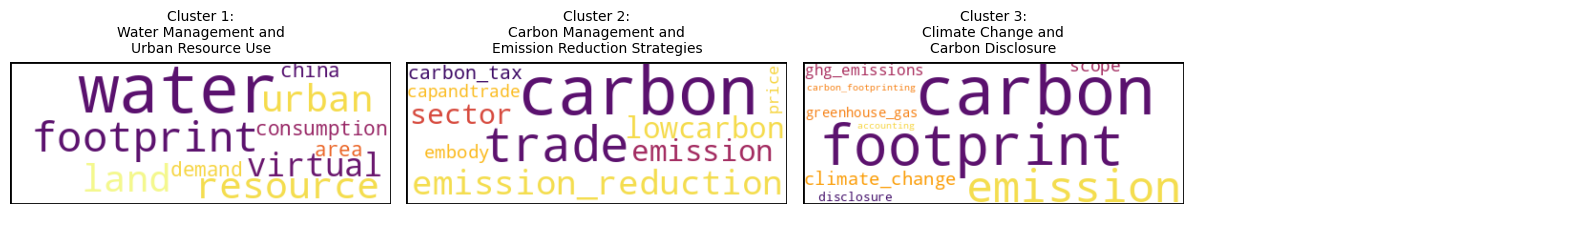

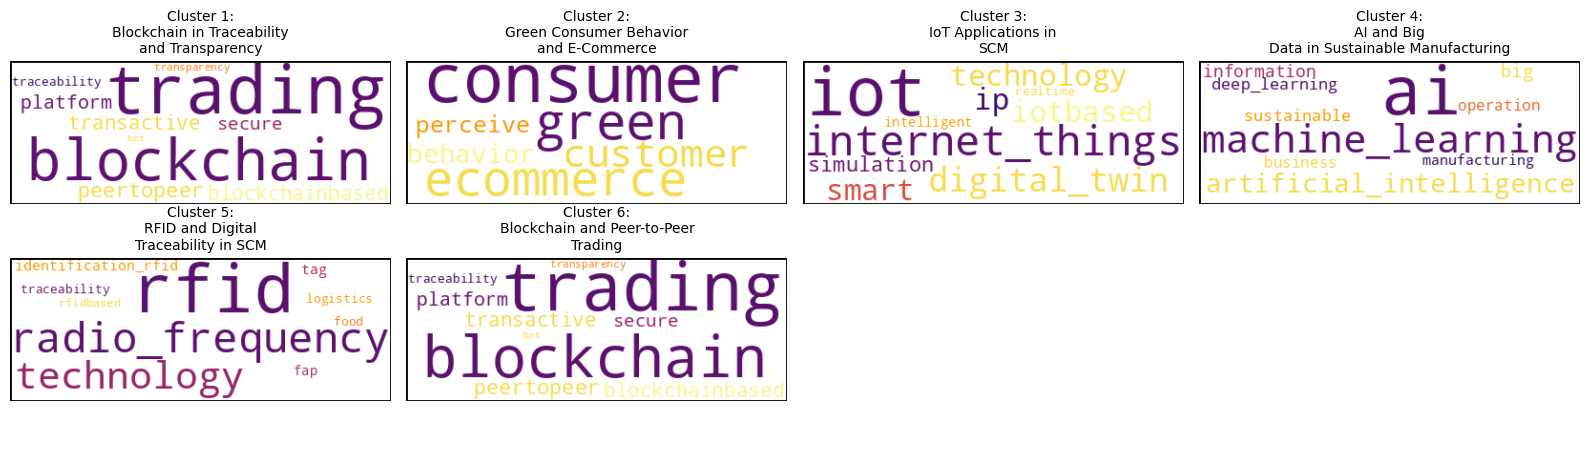

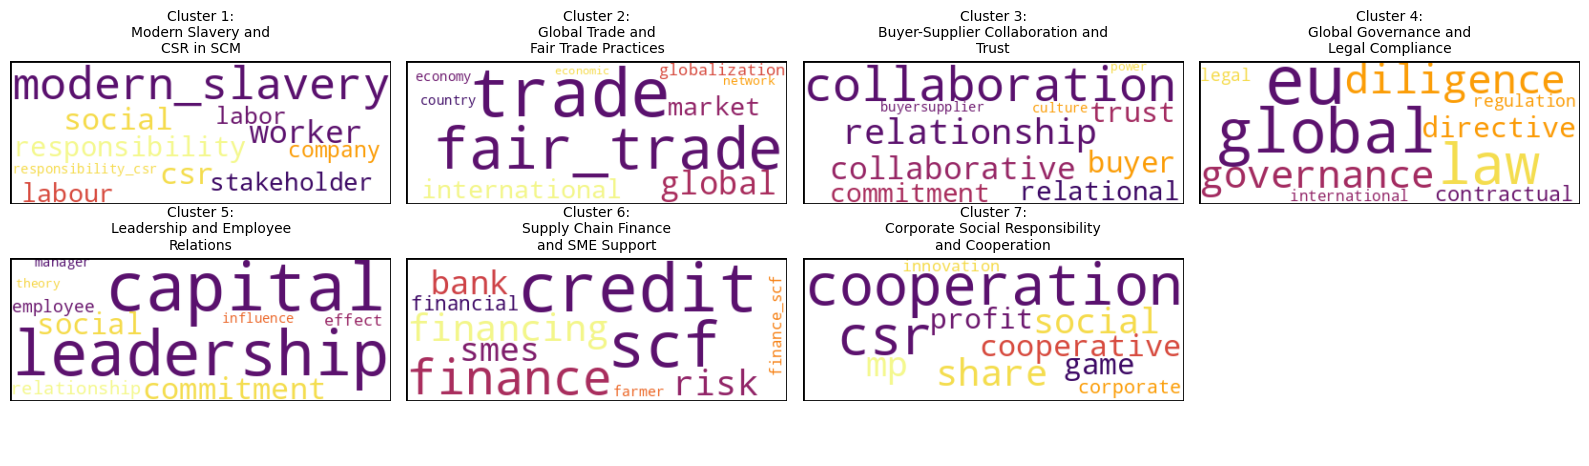

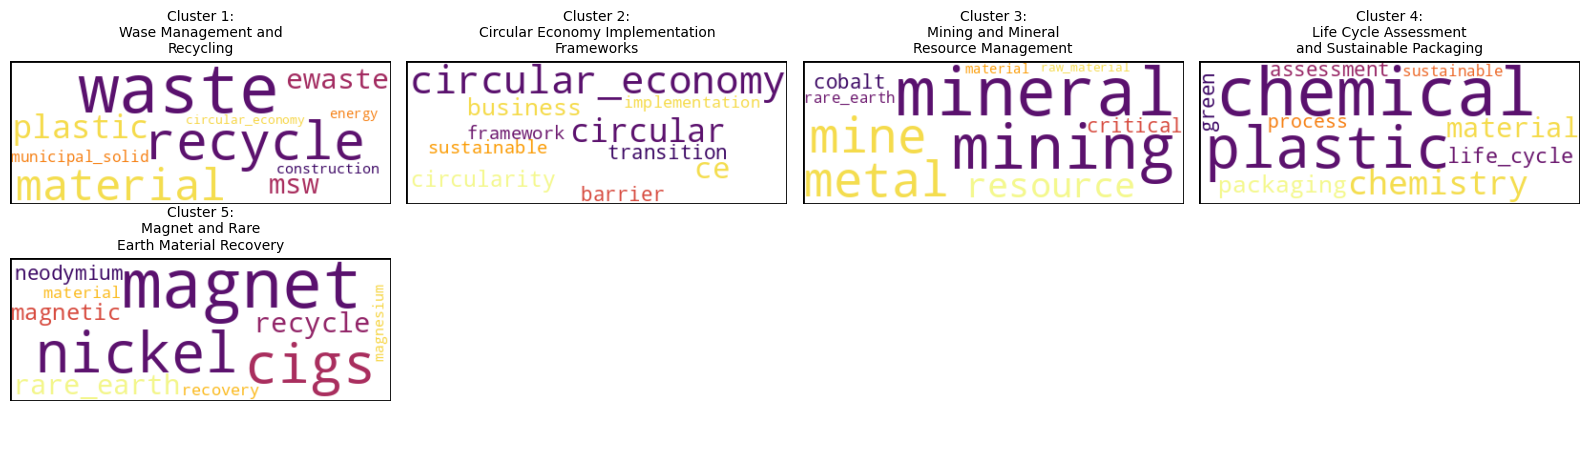

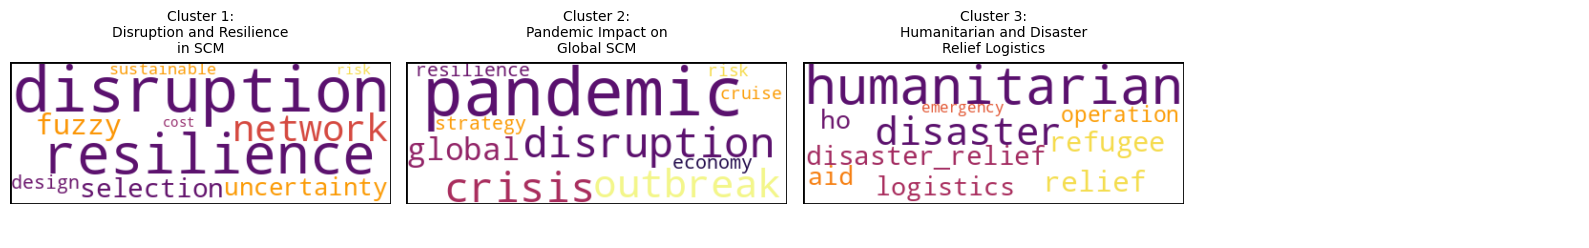

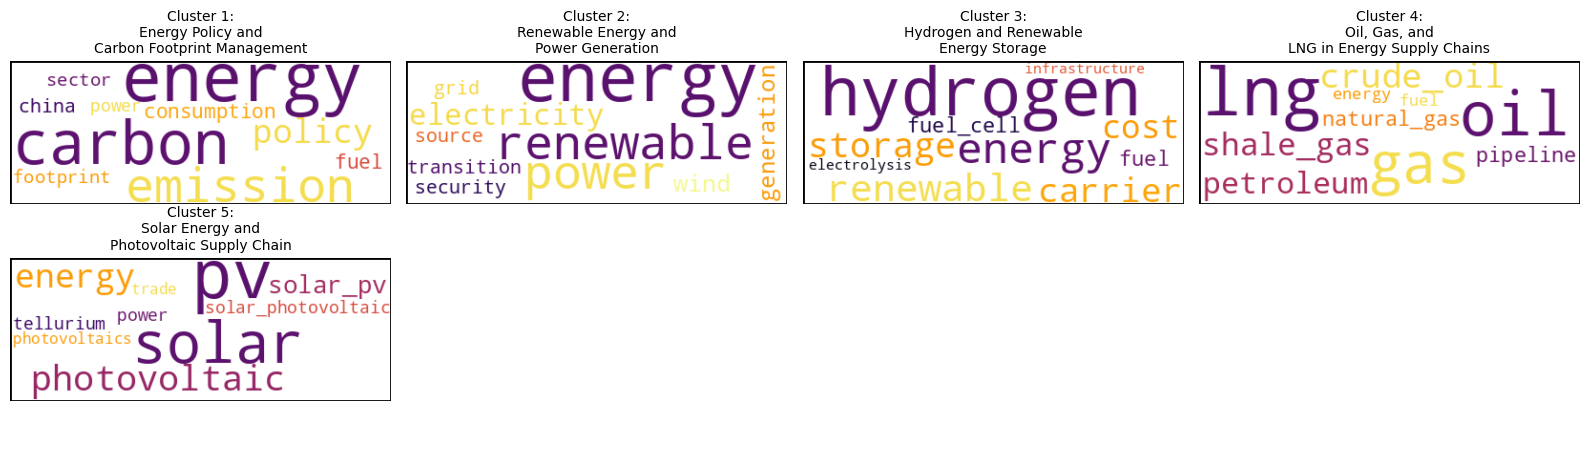

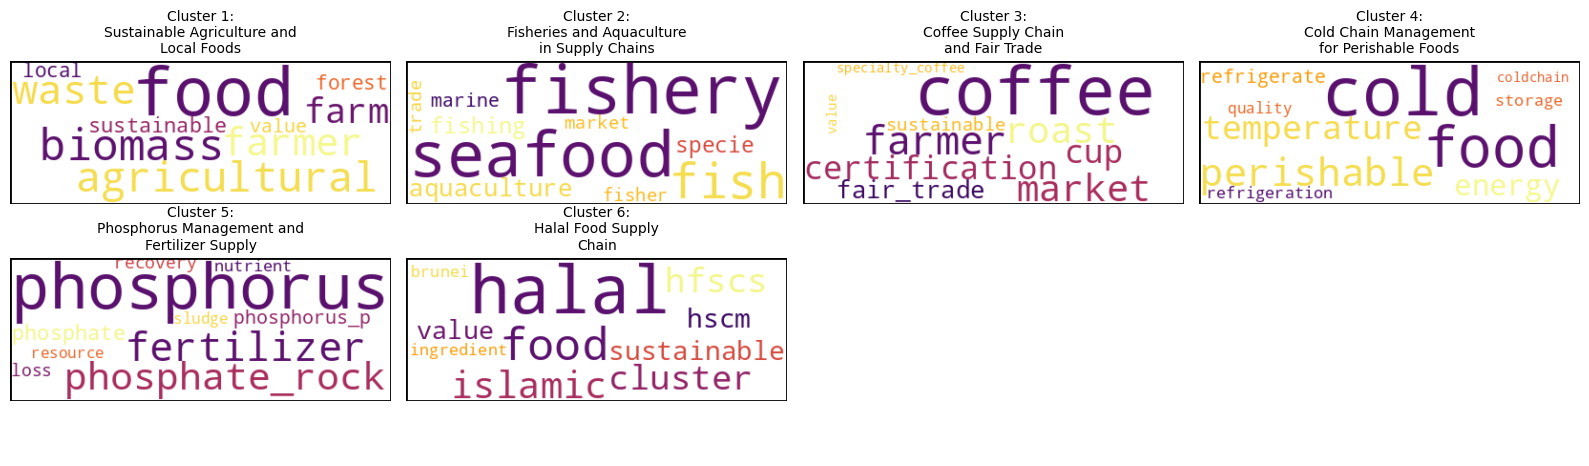

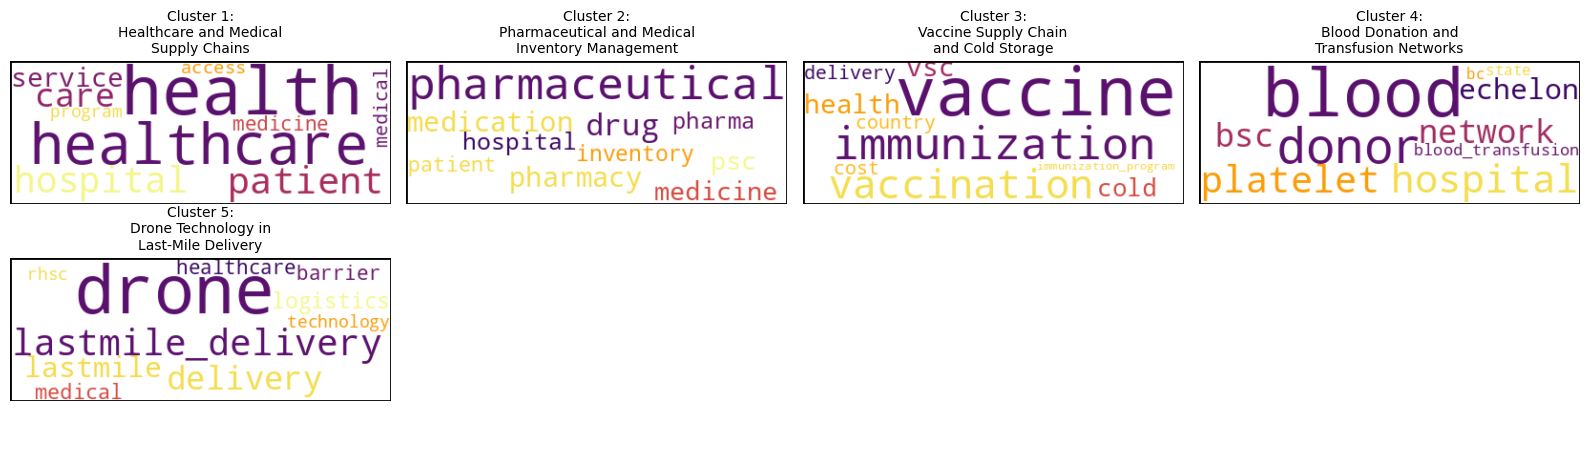

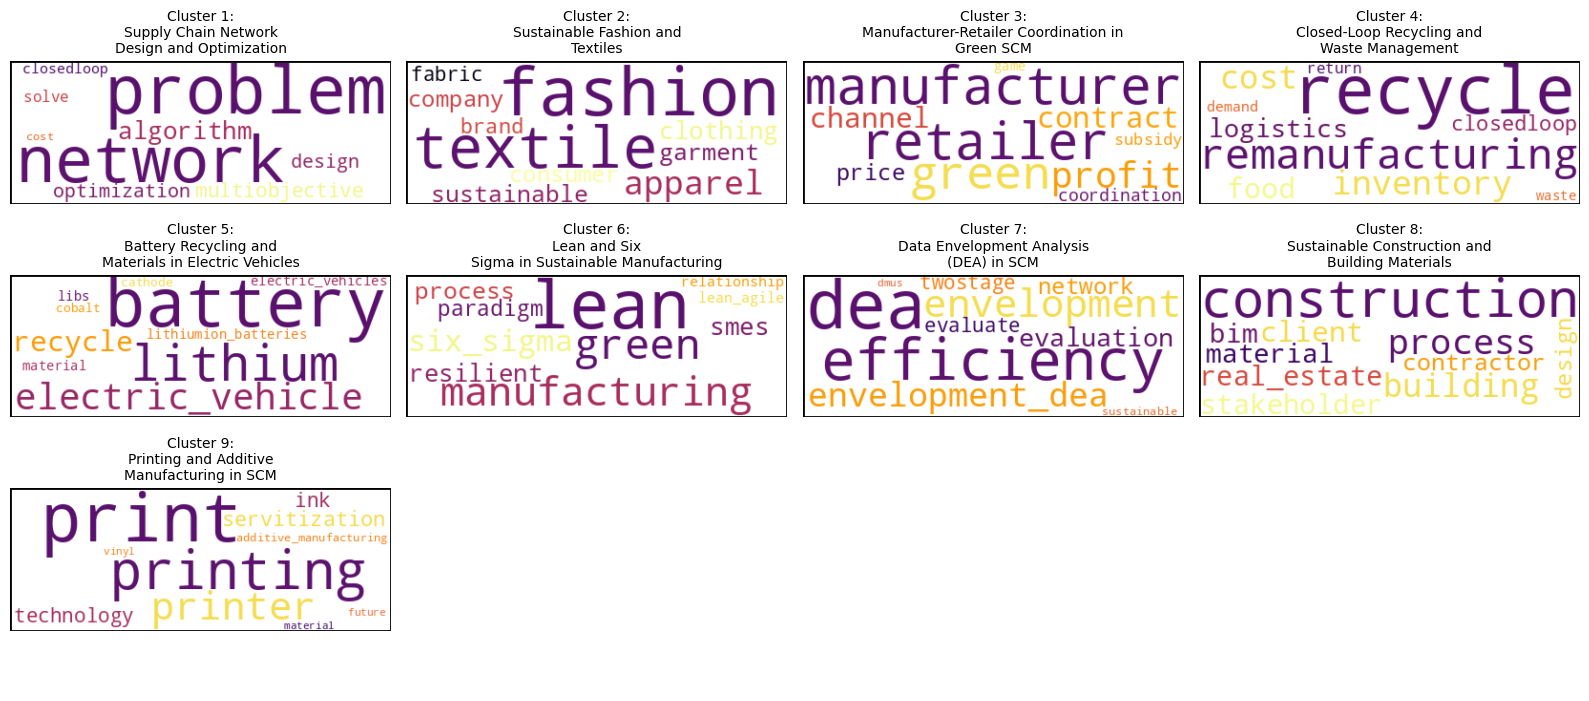

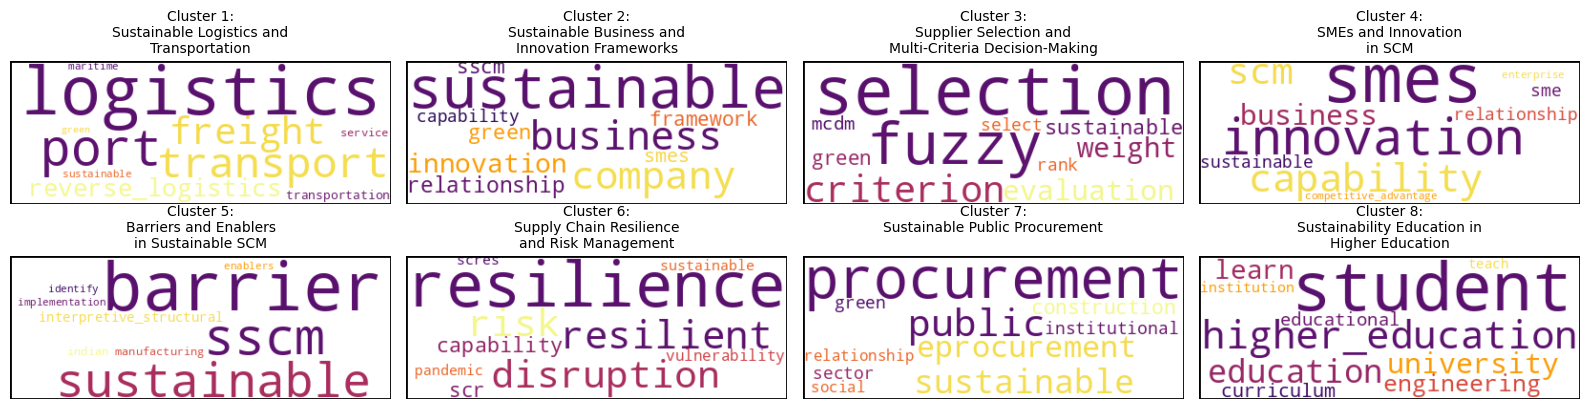

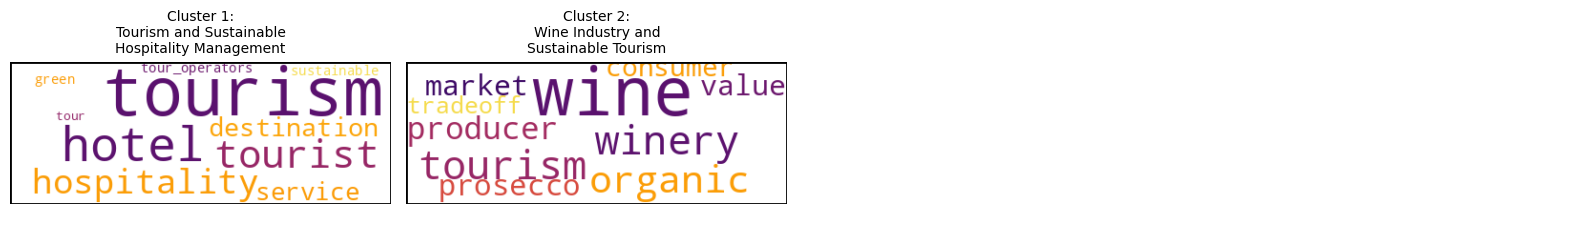

In [ ]:
# Function to parse the frequent words from the "Frequent Words" column
def parse_frequent_words(frequent_words_str):
    words = frequent_words_str.split(", ")
    word_freq = {word.split(" (")[0]: float(word.split("(")[1].strip(')')) for word in words}
    return word_freq


# Collect all frequencies for global min and max
all_frequencies = []
for freq_str in df['Frequent Words']:
    freq_dict = parse_frequent_words(freq_str)
    all_frequencies.extend(freq_dict.values())



# Function to normalize word frequencies with a wider range
def normalize_frequencies(frequent_words, min_size=0.05, max_size=1.2):
    scaler = MinMaxScaler(feature_range=(min_size, max_size))
    words, freqs = zip(*frequent_words.items())
    normalized_freqs = scaler.fit_transform(np.array(freqs).reshape(-1, 1)).flatten()
    return dict(zip(words, normalized_freqs))


# Function to parse the frequent words from the "Frequent Words" column
def parse_frequent_words(frequent_words_str):
    # Split the string by commas and extract the word and frequency as a dictionary
    words = frequent_words_str.split(", ")
    word_freq = {word.split(" (")[0]: float(word.split("(")[1].strip(')')) for word in words}
    return word_freq

# Prepare the data: group by Super Cluster and Cluster Name
super_clusters = df.groupby('Super Cluster')

# Function to create a word cloud
def generate_wordcloud(frequent_words):
    wc = WordCloud(
        width=400,              # Fixed width for all word clouds
        height=150,             # Fixed height for all word clouds
        background_color='white',  # Consistent background color
        colormap='inferno_r',     # Consistent color map
        max_font_size=70,       # Set max font size for consistency
        min_font_size=10,       # Set min font size if needed
        relative_scaling=0.5,    # Control relative scaling
        random_state=42
    )
    wc.generate_from_frequencies(frequent_words)
    return wc


# Fixed parameters for each subplot and entire figure width (4 columns)
single_plot_size = (4, 4)  # Each subplot is 4x4 inches

for super_cluster, sub_df in super_clusters:
    num_clusters = len(sub_df)

    # Set a fixed number of columns (4) and calculate the required rows based on clusters
    num_cols = 4
    num_rows = ceil(num_clusters / num_cols)  # Calculate rows to fit all clusters with 4 columns

    # Set the fixed size for the figure based on the number of rows (4 columns wide)
    fig, cluster_axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * single_plot_size[0], num_rows * single_plot_size[1]))
    cluster_axs = cluster_axs.flatten()  # Flatten the axes array for easier indexing

    # Loop to create each word cloud and plot in the subplot
    cluster_num = 0
    for cluster_idx, (index, row) in enumerate(sub_df.iterrows()):
        cluster_name = row['Cluster Name']
        if cluster_name == 'Sustainable Agriculture and Food Systems':
          cluster_name = 'Sustainable Agriculture and Local Foods'
        cluster_num += 1
        frequent_words_str = row['Frequent Words']
        frequent_words = parse_frequent_words(frequent_words_str)

        # Normalize word frequencies for consistent sizing across word clouds
        frequent_words = normalize_frequencies(frequent_words, min_size=0.2, max_size=1.2)
        wc = generate_wordcloud(frequent_words)

        # Plot word cloud in the assigned subplot
        cluster_axs[cluster_idx].imshow(wc, interpolation='bilinear')
        cluster_axs[cluster_idx].axis('off')

        # Add a border around each subplot
        border = Rectangle((0, 0), 1, 1, transform=cluster_axs[cluster_idx].transAxes,
                           edgecolor="black", linewidth=2, fill=False)
        cluster_axs[cluster_idx].add_patch(border)

        # Add a multi-line title with lower positioning
        words = cluster_name.split()
        line1 = ' '.join(words[:3])  # First three words
        line2 = ' '.join(words[3:])  # Remaining words
        cluster_axs[cluster_idx].set_title(f'Cluster {cluster_num}:\n{line1}\n{line2}', fontsize=10)

    # Turn off any remaining subplots to keep consistent figure size
    for ax in cluster_axs[num_clusters:]:
        ax.axis('off')  # Leave blank without any color or white space

    # Add sufficient space between rows
    hspace_value = 0.7 if num_clusters == 8 else 0.5
    plt.subplots_adjust(hspace=hspace_value)

    plt.tight_layout(rect=[0, 0, 1, 0.6])  # Final layout adjustment for fitting within paper
    # Save the figure to a file
    fig.savefig(f'/content/drive/MyDrive/Kiarash/New Codes/Final Figs Codes/WCs/{super_cluster}.png', bbox_inches='tight')

    plt.show()
    print()
    print()
    print()
    if cluster_idx == 1:
        break

## Geographic distribution

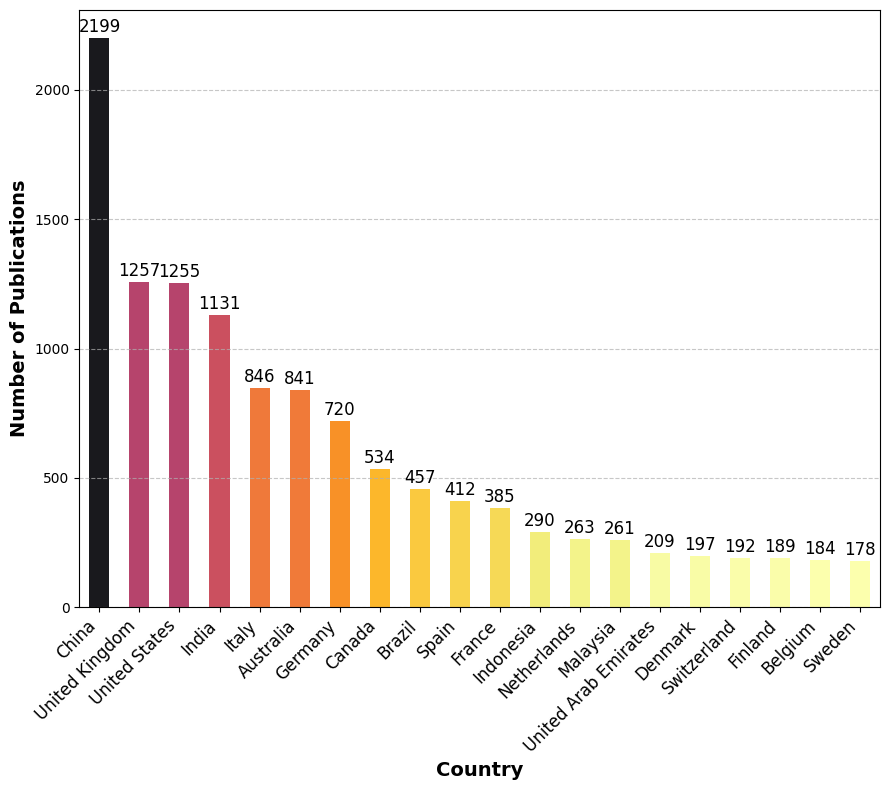

In [ ]:
# A helper function to extract countries from affiliation strings
def extract_country(affiliation):
    # Convert the affiliation string to lowercase for uniform matching
    affiliation = str(affiliation).lower()

    # Loop through countries and check if they appear in the affiliation string
    for country in pycountry.countries:
        if country.name.lower() in affiliation:
            return country.name
    return None

# Apply the function to the 'Affiliation' column
data['Country'] = data['Affiliations'].apply(extract_country)

# Drop rows where country could not be identified (NaN values)
df = data.dropna(subset=['Country'])

# Group by country and count occurrences
df_country_count = df['Country'].value_counts()

# Take the top 20 countries
df_top20_countries = df_country_count.head(20)

# Create the figure with advanced colormap and layout
plt.figure(figsize=(9,8))

# Generate a color map based on the number of publications
cmap = plt.get_cmap("inferno_r")
norm = plt.Normalize(df_top20_countries.min(), df_top20_countries.max())
colors = cmap(norm(df_top20_countries.values))

# Create the bar plot
bars = df_top20_countries.plot(kind='bar', color=colors, alpha=0.9)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add title and labels with custom font size and weight
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Number of Publications', fontsize=14, fontweight='bold')

# Angle the country labels on the x-axis for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add numbers on top of each bar for clarity
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=12, xytext=(0, 8),
                  textcoords='offset points')

# Apply tight layout to prevent clipping
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Kiarash/New Codes/Final Figs Codes/geographic_distribution.svg', format='svg')

# Show the plot
plt.show()


## Distribution across years of the dataset

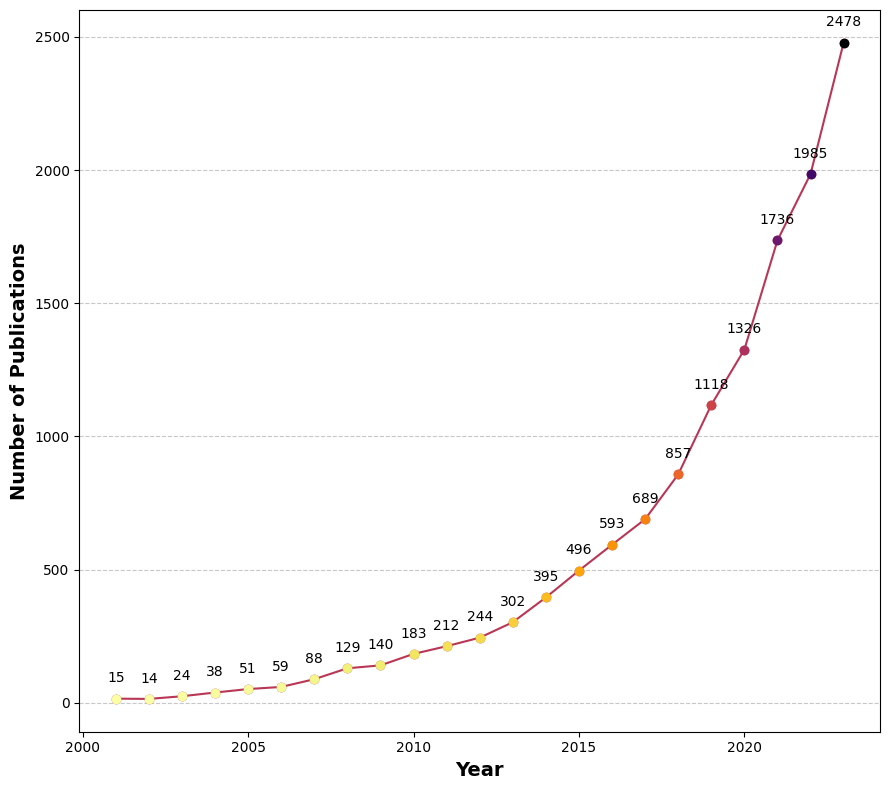

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Filter out the year 2024 and count publications per year
df_year_count = data[data['Year'] != 2024]['Year'].value_counts().sort_index()

# Normalize the color range based on the year count
norm = mcolors.Normalize(vmin=df_year_count.min(), vmax=df_year_count.max())
cmap = cm.inferno_r

# Plotting
plt.figure(figsize=(9,8))

# Plot line with colors from inferno_r colormap
colors = [cmap(norm(value)) for value in df_year_count.values]
plt.plot(df_year_count.index, df_year_count.values, marker='o', linestyle='-', color=cmap(0.5))  # Line color as mid-point

# Add color for each marker
for year, count, color in zip(df_year_count.index, df_year_count.values, colors):
    plt.plot(year, count, marker='o', color= color)
    plt.text(year, count + 50 , str(count), ha='center', va='bottom', fontsize=10, color='black')

# Title and labels
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Publications', fontsize=14, fontweight='bold')

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Kiarash/New Codes/Final Figs Codes/yearly_distribution.svg', format='svg')

plt.show()


## Mann-Kendall Test

In [ ]:
def analyze_topic_trends(data, df_groups):

    label = 'topics'

    # Group by 'label' (topics or Grouped_Topic) and 'Year' and count the number of documents
    yearly_topic_counts = data.groupby([label, 'Year']).size().reset_index(name='Count')

    # Initialize a list to store results
    results = []

    # Loop through each unique topic or Super Cluster
    for topic in yearly_topic_counts[label].unique():
        # Filter data for the current topic
        topic_data = yearly_topic_counts[yearly_topic_counts[label] == topic]

        # Perform the Mann-Kendall test on the 'Count' column for the current topic
        mk_result = mk.original_test(topic_data['Count'])


        # Store results in a dictionary
        results.append({
            label: topic,
            'Trend': mk_result.trend,
            "Kendall's Tau": mk_result.Tau,
            'P-value': mk_result.p,
            'Z-score': mk_result.z,
            'Sen\'s Slope': mk_result.slope
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    # Merge results with df_groups and sort by 'Cluster Number'
    merged_results = results_df.merge(
        df_groups[['Cluster', 'Cluster Name', 'Cluster Number']],
        left_on=label,
        right_on='Cluster',
        how='left'
    ).sort_values(by='Cluster Number')


    final_results_columns = [
        'Cluster Number',
        'Cluster Name',
        'Trend',
        "Kendall's Tau",
        'P-value',
        'Z-score',
        "Sen's Slope"
    ]

    # Only add 'Grouped_Topic' if it exists in merged_results
    if 'Grouped_Topic' in merged_results.columns:
        final_results_columns.append('Grouped_Topic')

    # Select columns from merged_results
    try:
        final_results = merged_results[final_results_columns]
    except KeyError as e:
        print("Column not found in DataFrame:", e)
        # Adjust column names as needed based on the error output

    return final_results

In [ ]:
final_results_topics = analyze_topic_trends(data, df_groups)  # For topics

# Remove rows where 'Cluster Number' or 'Cluster Name' are NaN
cleaned_results = final_results_topics.dropna(subset=['Cluster Number', 'Cluster Name'])

# Sort the DataFrame by Kendall's Tau in descending order
sorted_results = cleaned_results.sort_values(by="Kendall's Tau", ascending=False)

# Display the sorted DataFrame
sorted_results[['Kendall\'s Tau', 'P-value', 'Z-score', 'Sen\'s Slope']] = sorted_results[['Kendall\'s Tau', 'P-value', 'Z-score', 'Sen\'s Slope']].round(2)
sorted_results


,Cluster Number,Cluster Name,Trend,Kendall's Tau,P-value,Z-score,Sen's Slope
12,65.0,Carbon Management and Emission Reduction Strat...,increasing,0.98,0.00,3.86,3.00
1,1.0,Sustainable Agriculture and Food Systems,increasing,0.97,0.00,6.47,21.00
46,41.0,Blockchain in Traceability and Transparency,increasing,0.96,0.00,3.24,20.25
24,13.0,Supplier Selection and Multi-Criteria Decision...,increasing,0.94,0.00,5.24,4.70
56,45.0,AI and Big Data in Sustainable Manufacturing,increasing,0.93,0.01,2.49,4.00
66,68.0,Disruption and Resilience in SCM,increasing,0.90,0.00,4.62,2.88
2,10.0,Sustainable Logistics and Transportation,increasing,0.89,0.00,5.79,4.00
5,35.0,Circular Economy Implementation Frameworks,increasing,0.89,0.00,3.54,6.50
4,34.0,Wase Management and Recycling,increasing,0.88,0.00,5.42,1.36
55,59.0,Energy Policy and Carbon Footprint Management,increasing,0.87,0.00,5.16,1.92


## Kleinberg’s Burst Detection Algorithm

In [ ]:
def kleinberg_burst_detection(data, topic_col='Grouped_Topic', time_col='Year', count_col='Count', lambda_param =3):
    """
    Apply Kleinberg’s Burst Detection Algorithm to identify bursts in topic frequencies over time.

    Parameters:
        data (DataFrame): DataFrame containing topic frequencies with columns for topics, time, and counts.
        topic_col (str): Column name for grouped topics.
        time_col (str): Column name for time (years).
        count_col (str): Column name for the counts or frequency of topics.
        lambda_param (float): Rate of burst (controls sensitivity to bursts).

    Returns:
        DataFrame: Original DataFrame with additional columns indicating burst detection results.
    """

    # Check if required columns exist in the DataFrame
    if topic_col not in data.columns or time_col not in data.columns or count_col not in data.columns:
        raise KeyError(f"DataFrame must contain columns: {topic_col}, {time_col}, {count_col}")

    # Sort the data by time
    data = data.sort_values(by=[time_col])

    # Initialize burst detection variables
    data['Burst'] = 0  # Default to no burst
    data['Burst Strength'] = 0.0  # Explicitly cast Burst Strength to float

    # Determine the total time points
    time_points = data[time_col].unique()

    # Loop through each time point
    for i in range(len(time_points)):
        current_time = time_points[i]
        # Calculate the total count of topics at the current time
        current_count = data[data[time_col] == current_time][count_col].sum()

        # Identify potential bursty periods
        if i > 0:
            previous_time = time_points[i - 1]
            previous_count = data[data[time_col] == previous_time][count_col].sum()

            # Determine the burstiness by comparing current to previous
            if current_count > previous_count * lambda_param:  # If current count exceeds threshold
                data.loc[data[time_col] == current_time, 'Burst'] = 1  # Mark as burst
                data.loc[data[time_col] == current_time, 'Burst Strength'] = float(current_count / previous_count)

    return data


In [ ]:
# Prepare the 'Count' column if it doesn't exist
if 'Count' not in data.columns:
    data['Count'] = data.groupby(['topics', 'Year'])['topics'].transform('count')  # Count occurrences by topics



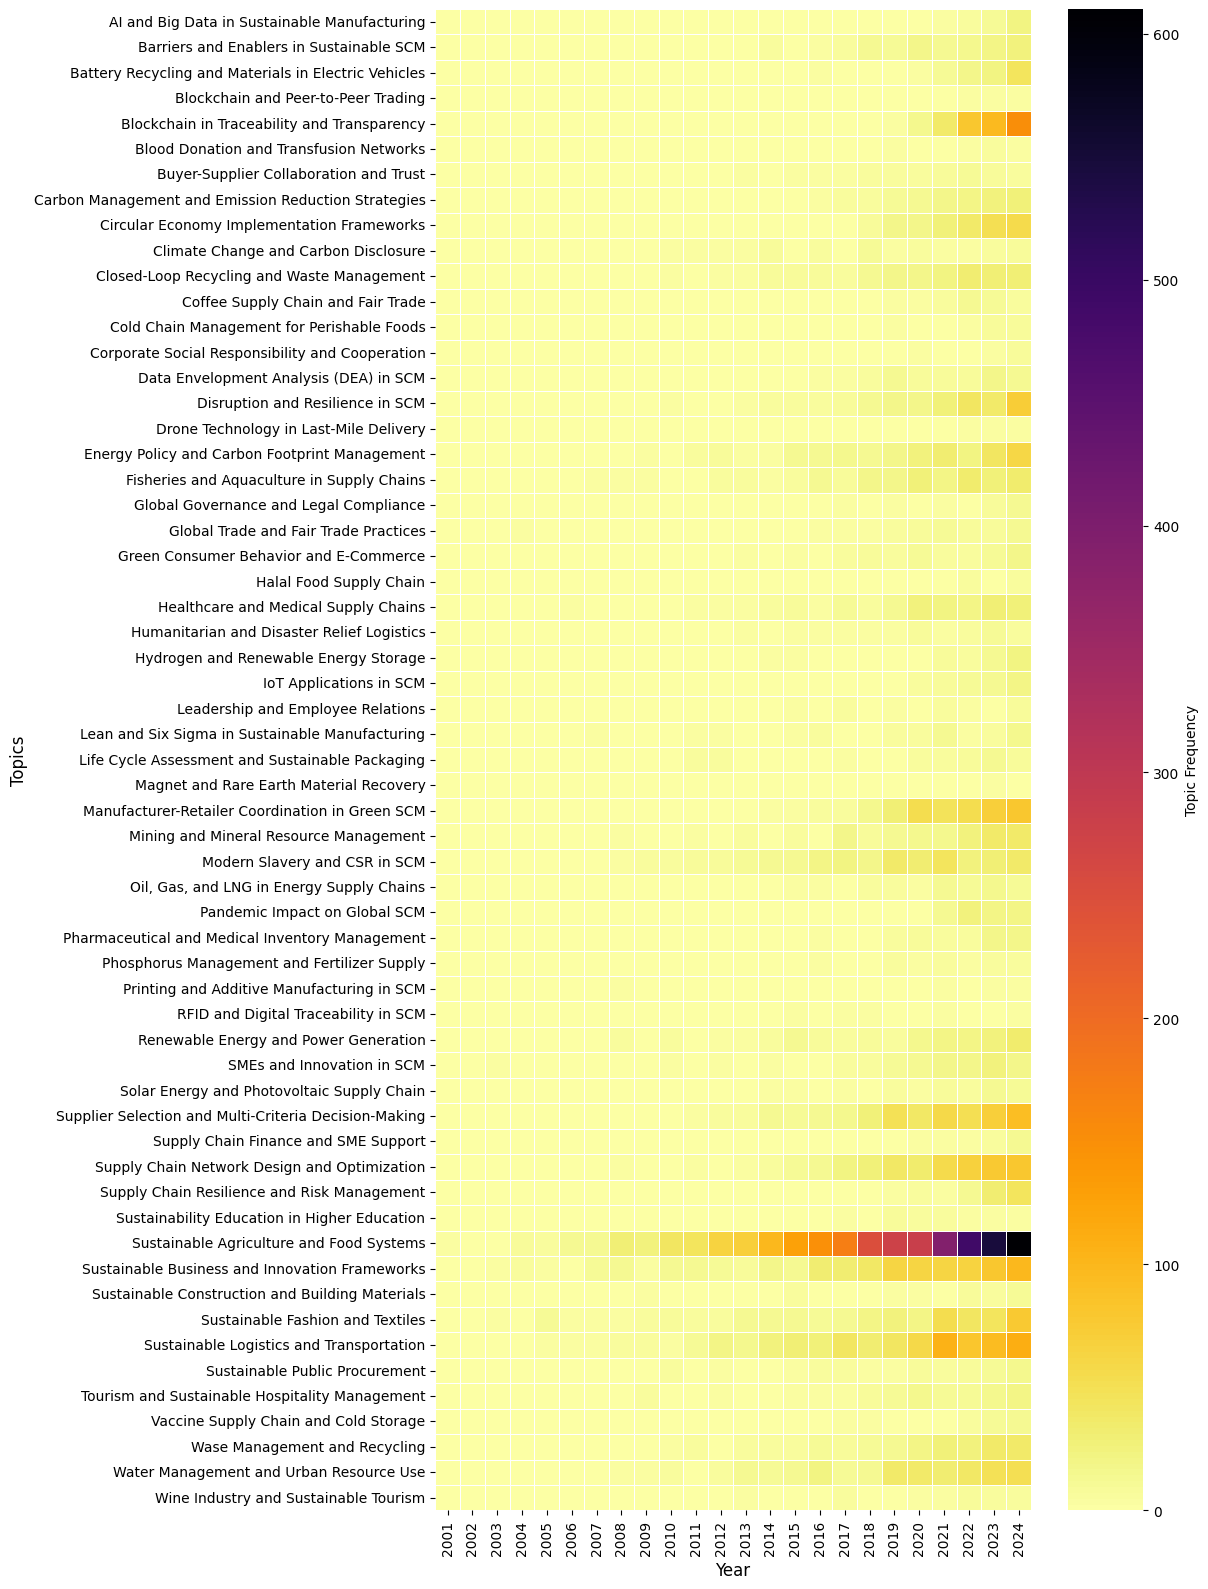

In [ ]:
# Apply Burst Detection on Individual Topics
burst_results_topics = kleinberg_burst_detection(data, topic_col='topics')

# Merge 'Cluster Name' and 'Cluster Number' from df_groups to burst_results_topics
burst_results_topics = burst_results_topics.merge(df_groups[['Cluster', 'Cluster Name', 'Cluster Number']],
                                                  left_on='topics',
                                                  right_on='Cluster',
                                                  how='left')

# Create 'Cluster Label' for plotting
burst_results_topics['Cluster Label'] = burst_results_topics.apply(
    lambda x: f"{str(x['Cluster Name'])}" if pd.notnull(x['Cluster Number']) and pd.notnull(x['Cluster Name']) else 'Unknown - ' + str(x['Cluster Name']),
    axis=1
)

# Filter out 'Unknown' labels
burst_results_topics = burst_results_topics[~burst_results_topics['Cluster Label'].str.contains('Unknown')]

# Sort by Cluster Number
burst_results_topics = burst_results_topics.sort_values(by='Cluster Number')

# Pivot the data to create a matrix where each row is a topic (Cluster Label) and each column is a year
heatmap_data = burst_results_topics.pivot_table(index='Cluster Label', columns='Year', values='Count', fill_value=0)

# Set up the matplotlib figure for heatmap
plt.figure(figsize=(12, 16))  # Increased height for better label visibility

# Draw the heatmap using Seaborn
sns.heatmap(heatmap_data, cmap="inferno_r", linewidths=.5, annot=False, cbar_kws={'label': 'Topic Frequency'})

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Topics', fontsize=12)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig('/content/drive/MyDrive/Kiarash/New Codes/Final Figs Codes/heatmap_supclus.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
heatmap_data

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Cluster Label,,,,,,,,,,,,,,,,,,,,,,,,
AI and Big Data in Sustainable Manufacturing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,7.0,11.0,22.0
Barriers and Enablers in Sustainable SCM,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0,3.0,7.0,12.0,10.0,18.0,12.0,16.0,21.0,25.0
Battery Recycling and Materials in Electric Vehicles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0,1.0,4.0,11.0,18.0,22.0,44.0
Blockchain and Peer-to-Peer Trading,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,4.0
Blockchain in Traceability and Transparency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,16.0,37.0,79.0,97.0,151.0
Blood Donation and Transfusion Networks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,2.0,4.0,5.0,4.0
Buyer-Supplier Collaboration and Trust,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,2.0,3.0,4.0,4.0,7.0,7.0,6.0,8.0,10.0,9.0,6.0
Carbon Management and Emission Reduction Strategies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,7.0,7.0,11.0,14.0,17.0,20.0,25.0,27.0
Circular Economy Implementation Frameworks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,18.0,17.0,27.0,36.0,52.0,56.0


## Z-Score Analysis

In [ ]:
data.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Authors', 'Author full names',
       'Author(s) ID', 'Title', 'Year', 'Source title', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher',
       'Combined_Text', 'cleaned_text', 'probs', 'topics', 'Unnamed: 0.2',
       'Country', 'Count'],
      dtype='object')

In [ ]:
import pandas as pd
import scipy.stats as stats

def calculate_z_scores(data, topic_col='Grouped_Topic', time_col='Year', count_col='Count'):
    """
    Calculate z-scores for each topic based on their frequencies over time.

    Parameters:
        data (DataFrame): DataFrame containing topic frequencies with columns for topics, time, and counts.
        topic_col (str): Column name for grouped topics.
        time_col (str): Column name for time (years).
        count_col (str): Column name for the counts or frequency of topics.

    Returns:
        DataFrame: Original DataFrame with additional columns for z-scores.
    """

    # Check if required columns exist in the DataFrame
    if topic_col not in data.columns or time_col not in data.columns or count_col not in data.columns:
        raise KeyError(f"DataFrame must contain columns: {topic_col}, {time_col}, {count_col}")

    # Calculate z-score using transform and stats.zscore for each group (topic)
    data['z_score'] = data.groupby(topic_col)[count_col].transform(lambda x: stats.zscore(x, nan_policy='omit'))

    return data


In [ ]:
# 1. Apply Z-Score Analysis on Individual Topics
z_score_results = calculate_z_scores(data, topic_col='topics', time_col='Year', count_col='Count')

# Merge 'Cluster Name' and 'Cluster Number' from df_groups to z_score_results_topics
z_score_results_topics = z_score_results.merge(df_groups[['Cluster', 'Cluster Name', 'Cluster Number']],
                                                  left_on='topics',
                                                  right_on='Cluster',
                                                  how='left')

# Create 'Cluster Label' for plotting
z_score_results_topics['Cluster Label'] = z_score_results_topics.apply(
    lambda x: f"{int(x['Cluster Number'])} - {str(x['Cluster Name'])}" if pd.notnull(x['Cluster Number']) and pd.notnull(x['Cluster Name']) else 'Unknown - ' + str(x['Cluster Name']),
    axis=1
)

# Remove duplicate entries based on 'Cluster Label' and 'z_score'
z_score_results_topics = z_score_results_topics.drop_duplicates(subset=['Cluster Label', 'z_score'])

# Get the top 10 hottest and coldest topics based on z-scores
top_hottest_topics = z_score_results_topics.nlargest(10, 'z_score')[['Cluster Label', 'z_score']]
top_coldest_topics = z_score_results_topics.nsmallest(10, 'z_score')[['Cluster Label', 'z_score']]

# Filter out rows where 'Cluster Label' contains 'Unknown - nan'
filtered_z_score_results = z_score_results_topics[
    ~z_score_results_topics['Cluster Label'].str.contains('Unknown - nan', na=False)
]

# Remove duplicate entries based on 'Cluster Label'
filtered_z_score_results = filtered_z_score_results.drop_duplicates(subset=['Cluster Label'])

# Get the top 10 hottest and coldest topics based on z-scores
top_hottest_topics = filtered_z_score_results.nlargest(10, 'z_score')[['Cluster Label', 'z_score']]
top_coldest_topics = filtered_z_score_results.nsmallest(10, 'z_score')[['Cluster Label', 'z_score']]

# Display the cleaned results for topics
#print("Top 10 Hottest Topics:")
#top_hottest_topics

#print("\nTop 10 Coldest Topics:")
top_coldest_topics



,Cluster Label,z_score
1553,21 - Sustainability Education in Higher Education,-0.630711
194,4 - Coffee Supply Chain and Fair Trade,-0.372380
81,52 - Buyer-Supplier Collaboration and Trust,-0.153253
12194,40 - Magnet and Rare Earth Material Recovery,-0.136083
439,71 - Humanitarian and Disaster Relief Logistics,-0.054494
125,78 - Wine Industry and Sustainable Tourism,0.035720
223,70 - Pandemic Impact on Global SCM,0.115194
99,"62 - Oil, Gas, and LNG in Energy Supply Chains",0.136881
88,29 - Data Envelopment Analysis (DEA) in SCM,0.188110
12048,75 - Blood Donation and Transfusion Networks,0.199840
